In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('../Resources/cleaned_data.csv')

In [12]:
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year
0,NY,PAS,67,SDN,TOYOT,1037A,BLK,2004
1,NY,PAS,51,SUBN,JEEP,1045A,GRAY,2017
2,NY,PAS,67,SUBN,TOYOT,1205P,WHITE,2021
3,NY,PAS,98,SUBN,NISSA,0535P,BLK,2002
4,FL,PAS,51,SUBN,SUBAR,0320P,GRAY,2005
5,NY,PAS,63,SUBN,CHEVR,1102A,WHT,2010
6,NY,PAS,45,SDN,NISSA,0606P,BLK,2002
7,NY,OMS,14,SDN,TOYOT,1250P,BLACK,2022
8,NY,PAS,20,SUBN,HONDA,1031A,RED,2005
9,NY,PAS,27,SDN,NISSA,0607P,BLACK,2022


In [13]:
df.dtypes

Registration State    object
Plate Type            object
Violation Code         int64
Vehicle Body Type     object
Vehicle Make          object
Violation Time        object
Vehicle Color         object
Vehicle Year           int64
dtype: object

In [14]:
#seeing how many of each plate type there are
df['Registration State'].value_counts().head(30)

NY    7382832
FL     137208
VA      35581
GA      26919
OH      12615
NJ       9265
IL       9074
99       5567
ME       4726
AL       4568
PA       4009
NH       3849
VT       3806
MN       3503
KY       1902
CT       1589
LA       1582
TX       1401
MS       1064
IN        877
MA        762
AR        756
MT        708
NC        655
CA        628
IA        545
TN        468
KS        321
AZ        284
DE        270
Name: Registration State, dtype: int64

In [15]:
#creating a dictionary for plate types for custom encoding. Only top 8 wil lbe uniquely encoded. Remaining will be under 'other'
plate_types = {
    'PAS': 0,
    'COM': 1,
    'OMT': 2,
    'SRF': 3,
    'OMS': 4,
    'APP': 5,
    'ORG': 6,
    'SPO': 7
}

states = {
    'NY': 0,
    'FL': 1,
    'VA': 2,
    'GA': 3,
    'OH': 4,
    'NJ': 5
}

#encoding dicts
body_types = {
    'SUBN':0,
    '4DSD':1,
    'VAN':2,
    'PICK':3,
    'DELV':4,
    '2DSD':5,
    'REFG':6,
    'SDN':7
}

make_types = {
    'HONDA':0,
    'FORD':1,
    'TOYOT':2,
    'NISSA':3,
    'CHEVR':4,
    'ME/BE':5,
    'BMW':6,
    'JEEP':7,
    'FRUEH':8,
    'HYUND':9,
    'SUBAR':10,
    'LEXUS':11
}

color_types = {
    'RED': 1,
    'BLK': 2,
    'BLU': 3,
    'WHT': 4,
    'GRN': 5,
    'GRY': 6,
    'ORG' : 7,
    'BRN' : 8,
    'OTH' : 9
}

In [16]:
#jc
df['Plate Type'] = df['Plate Type'].apply(lambda x: plate_types[x] if (x in plate_types) else 8)
df['Registration State'] = df['Registration State'].apply(lambda x: states[x] if (x in states) else 6)

#aw
df["body_type"] = df["Vehicle Body Type"].apply(lambda x: body_types[x] if x in body_types else 8)
df["make_type"] = df["Vehicle Make"].apply(lambda x: make_types[x] if x in make_types else 12)

In [17]:
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type
0,0,0,67,SDN,TOYOT,1037A,BLK,2004,7,2
1,0,0,51,SUBN,JEEP,1045A,GRAY,2017,0,7
2,0,0,67,SUBN,TOYOT,1205P,WHITE,2021,0,2
3,0,0,98,SUBN,NISSA,0535P,BLK,2002,0,3
4,1,0,51,SUBN,SUBAR,0320P,GRAY,2005,0,10
5,0,0,63,SUBN,CHEVR,1102A,WHT,2010,0,4
6,0,0,45,SDN,NISSA,0606P,BLK,2002,7,3
7,0,4,14,SDN,TOYOT,1250P,BLACK,2022,7,2
8,0,0,20,SUBN,HONDA,1031A,RED,2005,0,0
9,0,0,27,SDN,NISSA,0607P,BLACK,2022,7,3


In [18]:
#removing Violation time data without AM PM indicators
df['Violation Time len'] = df['Violation Time'].apply(len)
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type,Violation Time len
0,0,0,67,SDN,TOYOT,1037A,BLK,2004,7,2,5
1,0,0,51,SUBN,JEEP,1045A,GRAY,2017,0,7,5
2,0,0,67,SUBN,TOYOT,1205P,WHITE,2021,0,2,5
3,0,0,98,SUBN,NISSA,0535P,BLK,2002,0,3,5
4,1,0,51,SUBN,SUBAR,0320P,GRAY,2005,0,10,5
5,0,0,63,SUBN,CHEVR,1102A,WHT,2010,0,4,5
6,0,0,45,SDN,NISSA,0606P,BLK,2002,7,3,5
7,0,4,14,SDN,TOYOT,1250P,BLACK,2022,7,2,5
8,0,0,20,SUBN,HONDA,1031A,RED,2005,0,0,5
9,0,0,27,SDN,NISSA,0607P,BLACK,2022,7,3,5


In [19]:
len(df)

7659315

In [20]:
df = df.loc[df["Violation Time len"] == 5]
len(df)

7659299

In [21]:
df['Violation Time'] = df['Violation Time']+"M"
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type,Violation Time len
0,0,0,67,SDN,TOYOT,1037AM,BLK,2004,7,2,5
1,0,0,51,SUBN,JEEP,1045AM,GRAY,2017,0,7,5
2,0,0,67,SUBN,TOYOT,1205PM,WHITE,2021,0,2,5
3,0,0,98,SUBN,NISSA,0535PM,BLK,2002,0,3,5
4,1,0,51,SUBN,SUBAR,0320PM,GRAY,2005,0,10,5
5,0,0,63,SUBN,CHEVR,1102AM,WHT,2010,0,4,5
6,0,0,45,SDN,NISSA,0606PM,BLK,2002,7,3,5
7,0,4,14,SDN,TOYOT,1250PM,BLACK,2022,7,2,5
8,0,0,20,SUBN,HONDA,1031AM,RED,2005,0,0,5
9,0,0,27,SDN,NISSA,0607PM,BLACK,2022,7,3,5


In [22]:
#removing violation time not in 24:00hr format
df['violation_hour'] = df["Violation Time"].astype(str).str[:2].astype(int)
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type,Violation Time len,violation_hour
0,0,0,67,SDN,TOYOT,1037AM,BLK,2004,7,2,5,10
1,0,0,51,SUBN,JEEP,1045AM,GRAY,2017,0,7,5,10
2,0,0,67,SUBN,TOYOT,1205PM,WHITE,2021,0,2,5,12
3,0,0,98,SUBN,NISSA,0535PM,BLK,2002,0,3,5,5
4,1,0,51,SUBN,SUBAR,0320PM,GRAY,2005,0,10,5,3
5,0,0,63,SUBN,CHEVR,1102AM,WHT,2010,0,4,5,11
6,0,0,45,SDN,NISSA,0606PM,BLK,2002,7,3,5,6
7,0,4,14,SDN,TOYOT,1250PM,BLACK,2022,7,2,5,12
8,0,0,20,SUBN,HONDA,1031AM,RED,2005,0,0,5,10
9,0,0,27,SDN,NISSA,0607PM,BLACK,2022,7,3,5,6


In [23]:
df = df.loc[df["violation_hour"] <= 24]
len(df)

7659294

In [24]:
#correcting space (' ') to '0' in violation time 
df['Violation Time'] = df['Violation Time'].replace(' ', '0', regex=True)
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type,Violation Time len,violation_hour
0,0,0,67,SDN,TOYOT,1037AM,BLK,2004,7,2,5,10
1,0,0,51,SUBN,JEEP,1045AM,GRAY,2017,0,7,5,10
2,0,0,67,SUBN,TOYOT,1205PM,WHITE,2021,0,2,5,12
3,0,0,98,SUBN,NISSA,0535PM,BLK,2002,0,3,5,5
4,1,0,51,SUBN,SUBAR,0320PM,GRAY,2005,0,10,5,3
5,0,0,63,SUBN,CHEVR,1102AM,WHT,2010,0,4,5,11
6,0,0,45,SDN,NISSA,0606PM,BLK,2002,7,3,5,6
7,0,4,14,SDN,TOYOT,1250PM,BLACK,2022,7,2,5,12
8,0,0,20,SUBN,HONDA,1031AM,RED,2005,0,0,5,10
9,0,0,27,SDN,NISSA,0607PM,BLACK,2022,7,3,5,6


In [25]:
#convert to violation time to dataetime format
import datetime
df["Violation Time"] = pd.to_datetime(df["Violation Time"], format='%H%M%p' )

#converting datetime into minutes passed 12:00 AM
df['Violation Time'] = df['Violation Time'].apply(lambda x: (x.to_pydatetime()-datetime.datetime(1900,1,1)).total_seconds()/60)
df.head(10)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type,Violation Time len,violation_hour
0,0,0,67,SDN,TOYOT,637.0,BLK,2004,7,2,5,10
1,0,0,51,SUBN,JEEP,645.0,GRAY,2017,0,7,5,10
2,0,0,67,SUBN,TOYOT,725.0,WHITE,2021,0,2,5,12
3,0,0,98,SUBN,NISSA,335.0,BLK,2002,0,3,5,5
4,1,0,51,SUBN,SUBAR,200.0,GRAY,2005,0,10,5,3
5,0,0,63,SUBN,CHEVR,662.0,WHT,2010,0,4,5,11
6,0,0,45,SDN,NISSA,366.0,BLK,2002,7,3,5,6
7,0,4,14,SDN,TOYOT,770.0,BLACK,2022,7,2,5,12
8,0,0,20,SUBN,HONDA,631.0,RED,2005,0,0,5,10
9,0,0,27,SDN,NISSA,367.0,BLACK,2022,7,3,5,6


In [26]:
df.drop(columns=['Violation Time len','violation_hour'], axis=1, inplace=True)
df.head()

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type
0,0,0,67,SDN,TOYOT,637.0,BLK,2004,7,2
1,0,0,51,SUBN,JEEP,645.0,GRAY,2017,0,7
2,0,0,67,SUBN,TOYOT,725.0,WHITE,2021,0,2
3,0,0,98,SUBN,NISSA,335.0,BLK,2002,0,3
4,1,0,51,SUBN,SUBAR,200.0,GRAY,2005,0,10


In [27]:
#cleaning up typos and variations of colors
color_conversion = {
    'RED': ['RD', 'RED', 'R'],
    'BLK': ['BLK', 'BLACK', 'BK','DK' ],
    'BLU': ['BLUE', 'BLU', 'BL', 'BLBL', 'DKBL'],
    'WHT': ['WHT', 'WH', 'WT', 'WHI', 'W', 'WHIT', 'WTE', 'WHTN', 'White'],
    'GRN': ['GR', 'GREEN', 'GRN'],
    'GRY': ['GY', 'GRAY', 'GRY', 'GARY', 'Gray', 'GRA', 'SILVE', 'SLV', 'SIL', 'SILV', 'SILVR', 'SIVR', 'SILIV', 'SLIVE', 'SILVA', 'DK/GY', 'LT/GR', 'SLVER', 'GAY', 'SILER', 'GGREY'],
    'ORG' : ['OR','ORG','ONG'],
    'BRN' : ['TAN','BRO','BEIGE','BROW','BROWN']
}

#creating a key-value pair to use map
color_dict = {}
for x in color_conversion:
    for z in color_conversion[x]:
        color_dict[z]=x
print(color_dict)



{'RD': 'RED', 'RED': 'RED', 'R': 'RED', 'BLK': 'BLK', 'BLACK': 'BLK', 'BK': 'BLK', 'DK': 'BLK', 'BLUE': 'BLU', 'BLU': 'BLU', 'BL': 'BLU', 'BLBL': 'BLU', 'DKBL': 'BLU', 'WHT': 'WHT', 'WH': 'WHT', 'WT': 'WHT', 'WHI': 'WHT', 'W': 'WHT', 'WHIT': 'WHT', 'WTE': 'WHT', 'WHTN': 'WHT', 'White': 'WHT', 'GR': 'GRN', 'GREEN': 'GRN', 'GRN': 'GRN', 'GY': 'GRY', 'GRAY': 'GRY', 'GRY': 'GRY', 'GARY': 'GRY', 'Gray': 'GRY', 'GRA': 'GRY', 'SILVE': 'GRY', 'SLV': 'GRY', 'SIL': 'GRY', 'SILV': 'GRY', 'SILVR': 'GRY', 'SIVR': 'GRY', 'SILIV': 'GRY', 'SLIVE': 'GRY', 'SILVA': 'GRY', 'DK/GY': 'GRY', 'LT/GR': 'GRY', 'SLVER': 'GRY', 'GAY': 'GRY', 'SILER': 'GRY', 'GGREY': 'GRY', 'OR': 'ORG', 'ORG': 'ORG', 'ONG': 'ORG', 'TAN': 'BRN', 'BRO': 'BRN', 'BEIGE': 'BRN', 'BROW': 'BRN', 'BROWN': 'BRN'}


In [28]:
df['Vehicle Color'] = df['Vehicle Color'].map(color_dict)
df.head(5)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type
0,0,0,67,SDN,TOYOT,637.0,BLK,2004,7,2
1,0,0,51,SUBN,JEEP,645.0,GRY,2017,0,7
2,0,0,67,SUBN,TOYOT,725.0,NaN,2021,0,2
3,0,0,98,SUBN,NISSA,335.0,BLK,2002,0,3
4,1,0,51,SUBN,SUBAR,200.0,GRY,2005,0,10


In [29]:
df['Vehicle Color'] = df['Vehicle Color'].fillna("OTH")
df.head(5)

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type
0,0,0,67,SDN,TOYOT,637.0,BLK,2004,7,2
1,0,0,51,SUBN,JEEP,645.0,GRY,2017,0,7
2,0,0,67,SUBN,TOYOT,725.0,OTH,2021,0,2
3,0,0,98,SUBN,NISSA,335.0,BLK,2002,0,3
4,1,0,51,SUBN,SUBAR,200.0,GRY,2005,0,10


In [30]:
#aw
df["color_type"] = df["Vehicle Color"].apply(lambda x: color_types[x] if x in color_types else 9)

In [31]:
df.head()

,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Vehicle Color,Vehicle Year,body_type,make_type,color_type
0,0,0,67,SDN,TOYOT,637.0,BLK,2004,7,2,2
1,0,0,51,SUBN,JEEP,645.0,GRY,2017,0,7,6
2,0,0,67,SUBN,TOYOT,725.0,OTH,2021,0,2,9
3,0,0,98,SUBN,NISSA,335.0,BLK,2002,0,3,2
4,1,0,51,SUBN,SUBAR,200.0,GRY,2005,0,10,6


In [32]:
df = df.drop(columns = ['Vehicle Body Type', 'Vehicle Make', 'Vehicle Color'])
df.head()

,Registration State,Plate Type,Violation Code,Violation Time,Vehicle Year,body_type,make_type,color_type
0,0,0,67,637.0,2004,7,2,2
1,0,0,51,645.0,2017,0,7,6
2,0,0,67,725.0,2021,0,2,9
3,0,0,98,335.0,2002,0,3,2
4,1,0,51,200.0,2005,0,10,6


In [33]:
#Optional Code if ML doesn't like the smaller counts of violation codes
filtered_df = df.copy()
bool_df = (filtered_df.groupby(['Violation Code']).count() > 10000)
list_of_codes = bool_df.index[bool_df['Registration State'] == True].tolist()

filtered_df['Violation Code'] = filtered_df['Violation Code'].loc[filtered_df['Violation Code'].isin(list_of_codes)]
filtered_df = filtered_df.dropna()
filtered_df.reset_index(drop = True)
filtered_df.head()

,Registration State,Plate Type,Violation Code,Violation Time,Vehicle Year,body_type,make_type,color_type
1,0,0,51.0,645.0,2017,0,7,6
3,0,0,98.0,335.0,2002,0,3,2
4,1,0,51.0,200.0,2005,0,10,6
7,0,4,14.0,770.0,2022,7,2,2
8,0,0,20.0,631.0,2005,0,0,1


In [34]:
filtered_df.to_csv('../Resources/training_data.csv')

# RANDOM BATCH LOADER

In [35]:
import numpy as np
def r_batch_loader(X, y, batch_size):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples/batch_size))
    
    # Random shuffling for batches
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        batch_indices = indices[start:end]
        #Extract the current batch from the data
        X_batch = X.iloc[batch_indices]
        y_batch = y.iloc[batch_indices]
        yield X_batch, y_batch

# BATCH LOADER

In [36]:
def batch_loader(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_cols = [i for i in filtered_df.columns if i not in ('Violation Code')]
X, y = filtered_df[x_cols], filtered_df['Violation Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

model = LogisticRegression(solver ='saga', random_state = 2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)





In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import classification_report_imbalanced

cm = confusion_matrix(y_test, y_pred)
print("Evaluation metrics:")
print(f"Confusion Matrix: {cm}")

tn, fp, fn, tp = cm.ravel()

# Calculate the accuracy, precision, recall, specificity, and F1 score
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)



print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print()

In [ ]:
import seaborn as sns
import numpy as np
sns.heatmap(cm/np.sum(cm), annot=False, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test,y_pred)}")

# RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


x_cols = [i for i in filtered_df.columns if i not in ('Violation Code')]
X = filtered_df[x_cols]
y = filtered_df['Violation Code']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
batch_size = 10**4
batch_gen = batch_loader(X_train, batch_size)

scaler = StandardScaler()
rf_model = RandomForestClassifier(n_estimators=50, random_state=78) 


for batch in batch_gen:
    X = scaler.fit_transform(batch[x_cols])
    y = y_train[:len(batch)]
    rf_model.fit(X, y)
    
X_test_scaled = scaler.transform(X_test)
y_pred = rf_model.predict(X_test_scaled)


In [59]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)


# Displaying results
print("Confusion Matrix")
display(cm)
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Confusion Matrix


array([[1705, 1260,   65, ...,    0,   42,   28],
       [1719, 1489,  101, ...,    0,   44,   63],
       [ 120,  218,    6, ...,    1,    4,    3],
       ...,
       [  31,   56,    3, ...,    0,    0,    0],
       [  66,   16,    0, ...,    0,    0,    0],
       [  83,   71,    8, ...,    0,    2,    4]], dtype=int64)

Accuracy Score : 0.03102641873258547
Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        5.0       0.04      0.02      0.98      0.03      0.15      0.02     77172
        7.0       0.04      0.02      0.98      0.02      0.13      0.02     86572
       10.0       0.00      0.00      1.00      0.00      0.03      0.00      8035
       12.0       0.00      0.00      1.00      0.00      0.03      0.00      6697
       14.0       0.04      0.02      0.98      0.02      0.13      0.02     78535
       16.0       0.01      0.01      0.99      0.01      0.07      0.00     23587
       17.0       0.01      0.00      1.00      0.00      0.05      0.00     11607
       18.0       0.00      0.00      1.00      0.00      0.03      0.00      2881
       19.0       0.01      0.01      0.99      0.01      0.08      0.01     23535
       20.0       0.04      0.01      0.99      0.02      0.12      0.01     69336
       21.0       0.11     

<AxesSubplot:>

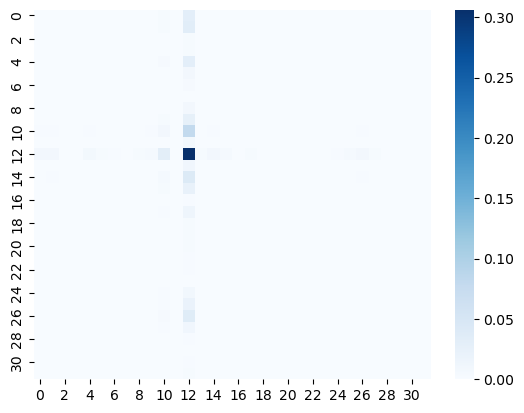

In [60]:
import seaborn as sns
import numpy as np
sns.heatmap(cm/np.sum(cm), annot=False, 
            fmt='.2%', cmap='Blues')

# SMOTEENN LOGISTIC REGRESSION

In [45]:
x_cols = [i for i in filtered_df.columns if i not in ('Violation Code')]
X, y = filtered_df[x_cols], filtered_df['Violation Code']

In [26]:
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

batch_size = 10**6
n_epochs = 1

for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    
    # Initialize the batch loader with the training data and batch size
    batch_gen = r_batch_loader(X_train, y_train, batch_size)
    
    
    for X_batch, y_batch in batch_gen:
    # Perform SMOTEENN resampling on the current batch
        #smote_enn = SMOTEENN(random_state = 0)
        #X_resampled, y_resampled = smote_enn.fit_resample(X_batch,y_batch)
        
        # Train a logistic regression model on the resampled data
        model = LogisticRegression(solver ='lbfgs', random_state = 2)
        model.fit(X_batch, y_batch)



Epoch 1/1


C:\Users\choju\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\choju\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

In [27]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import classification_report_imbalanced

#accuracy = accuracy_score(y_test, y_pred, average='macro')
#precision = precision_score(y_test, y_pred, average='macro')
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
bac = balanced_accuracy_score(y_test, y_pred)

print("Evaluation metrics:")
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Precision: {precision:.4f}")
#print(f"Recall: {recall:.4f}")
#print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: {cm}")
print(f"Balanced Accuracy Score: {bac}")
print()

Evaluation metrics:
Confusion Matrix: 1901625
Balanced Accuracy Score: 0.029411764705882353

